# Bike Sharing : Linear Regression Assignment

In [2]:
#import warnings

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step-1 :  Reading and Understanding the Data

In [5]:
# Reading data from day.csv file

bike_share_data = pd.read_csv(r'C:\Users\saksh\Downloads\day.csv')

In [6]:
bike_share_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### The dataset has 730 rows and 16 columns

In [8]:
# checking the shape of data

bike_share_data.shape

(730, 16)

In [9]:
# printing info for dataset

bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# describing the columns for dataset

bike_share_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning :
#####            1. Check missing or null values in dataset
#####            2. Drop unwanted columns from dataset

In [12]:
# check if any null values present in dataset columns

bike_share_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Therefore, there is no missing values in dataset

##### ~ Removing the unwanted columns : instant, dteday, casual and registered, reason stated as following:

In [15]:
# instant is just an index column and is not of any use for target variable.
# dteday column has same record present in yr, mnth and weekday columns
# Lastly,the sum of casual and registered columns values are presented as cnt column in dataset.

bike_share_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# verify the columns of updated dataset

bike_share_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Data Formatting:

In [19]:
# For better analysis ,change the data type from integer to categorical for variable 'season', 'mnth', 'weekday' and 'weathersit' 

season_data = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
mnth_data = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
weekday_data = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
weathersit_data = {1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'}

bike_share_data.season = bike_share_data.season.map(season_data)
bike_share_data.mnth = bike_share_data.mnth.map(mnth_data)
bike_share_data.weekday = bike_share_data.weekday.map(weekday_data)
bike_share_data.weathersit = bike_share_data.weathersit.map(weathersit_data)

bike_share_data     # display the updated data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,0,misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,1,clear,10.489153,11.58500,48.3333,23.500518,1796


## Step-2 : EDA - Visualising the Data

#### ~ Visualising the linear relationship of all variables in dataset :

<Figure size 2000x1500 with 0 Axes>

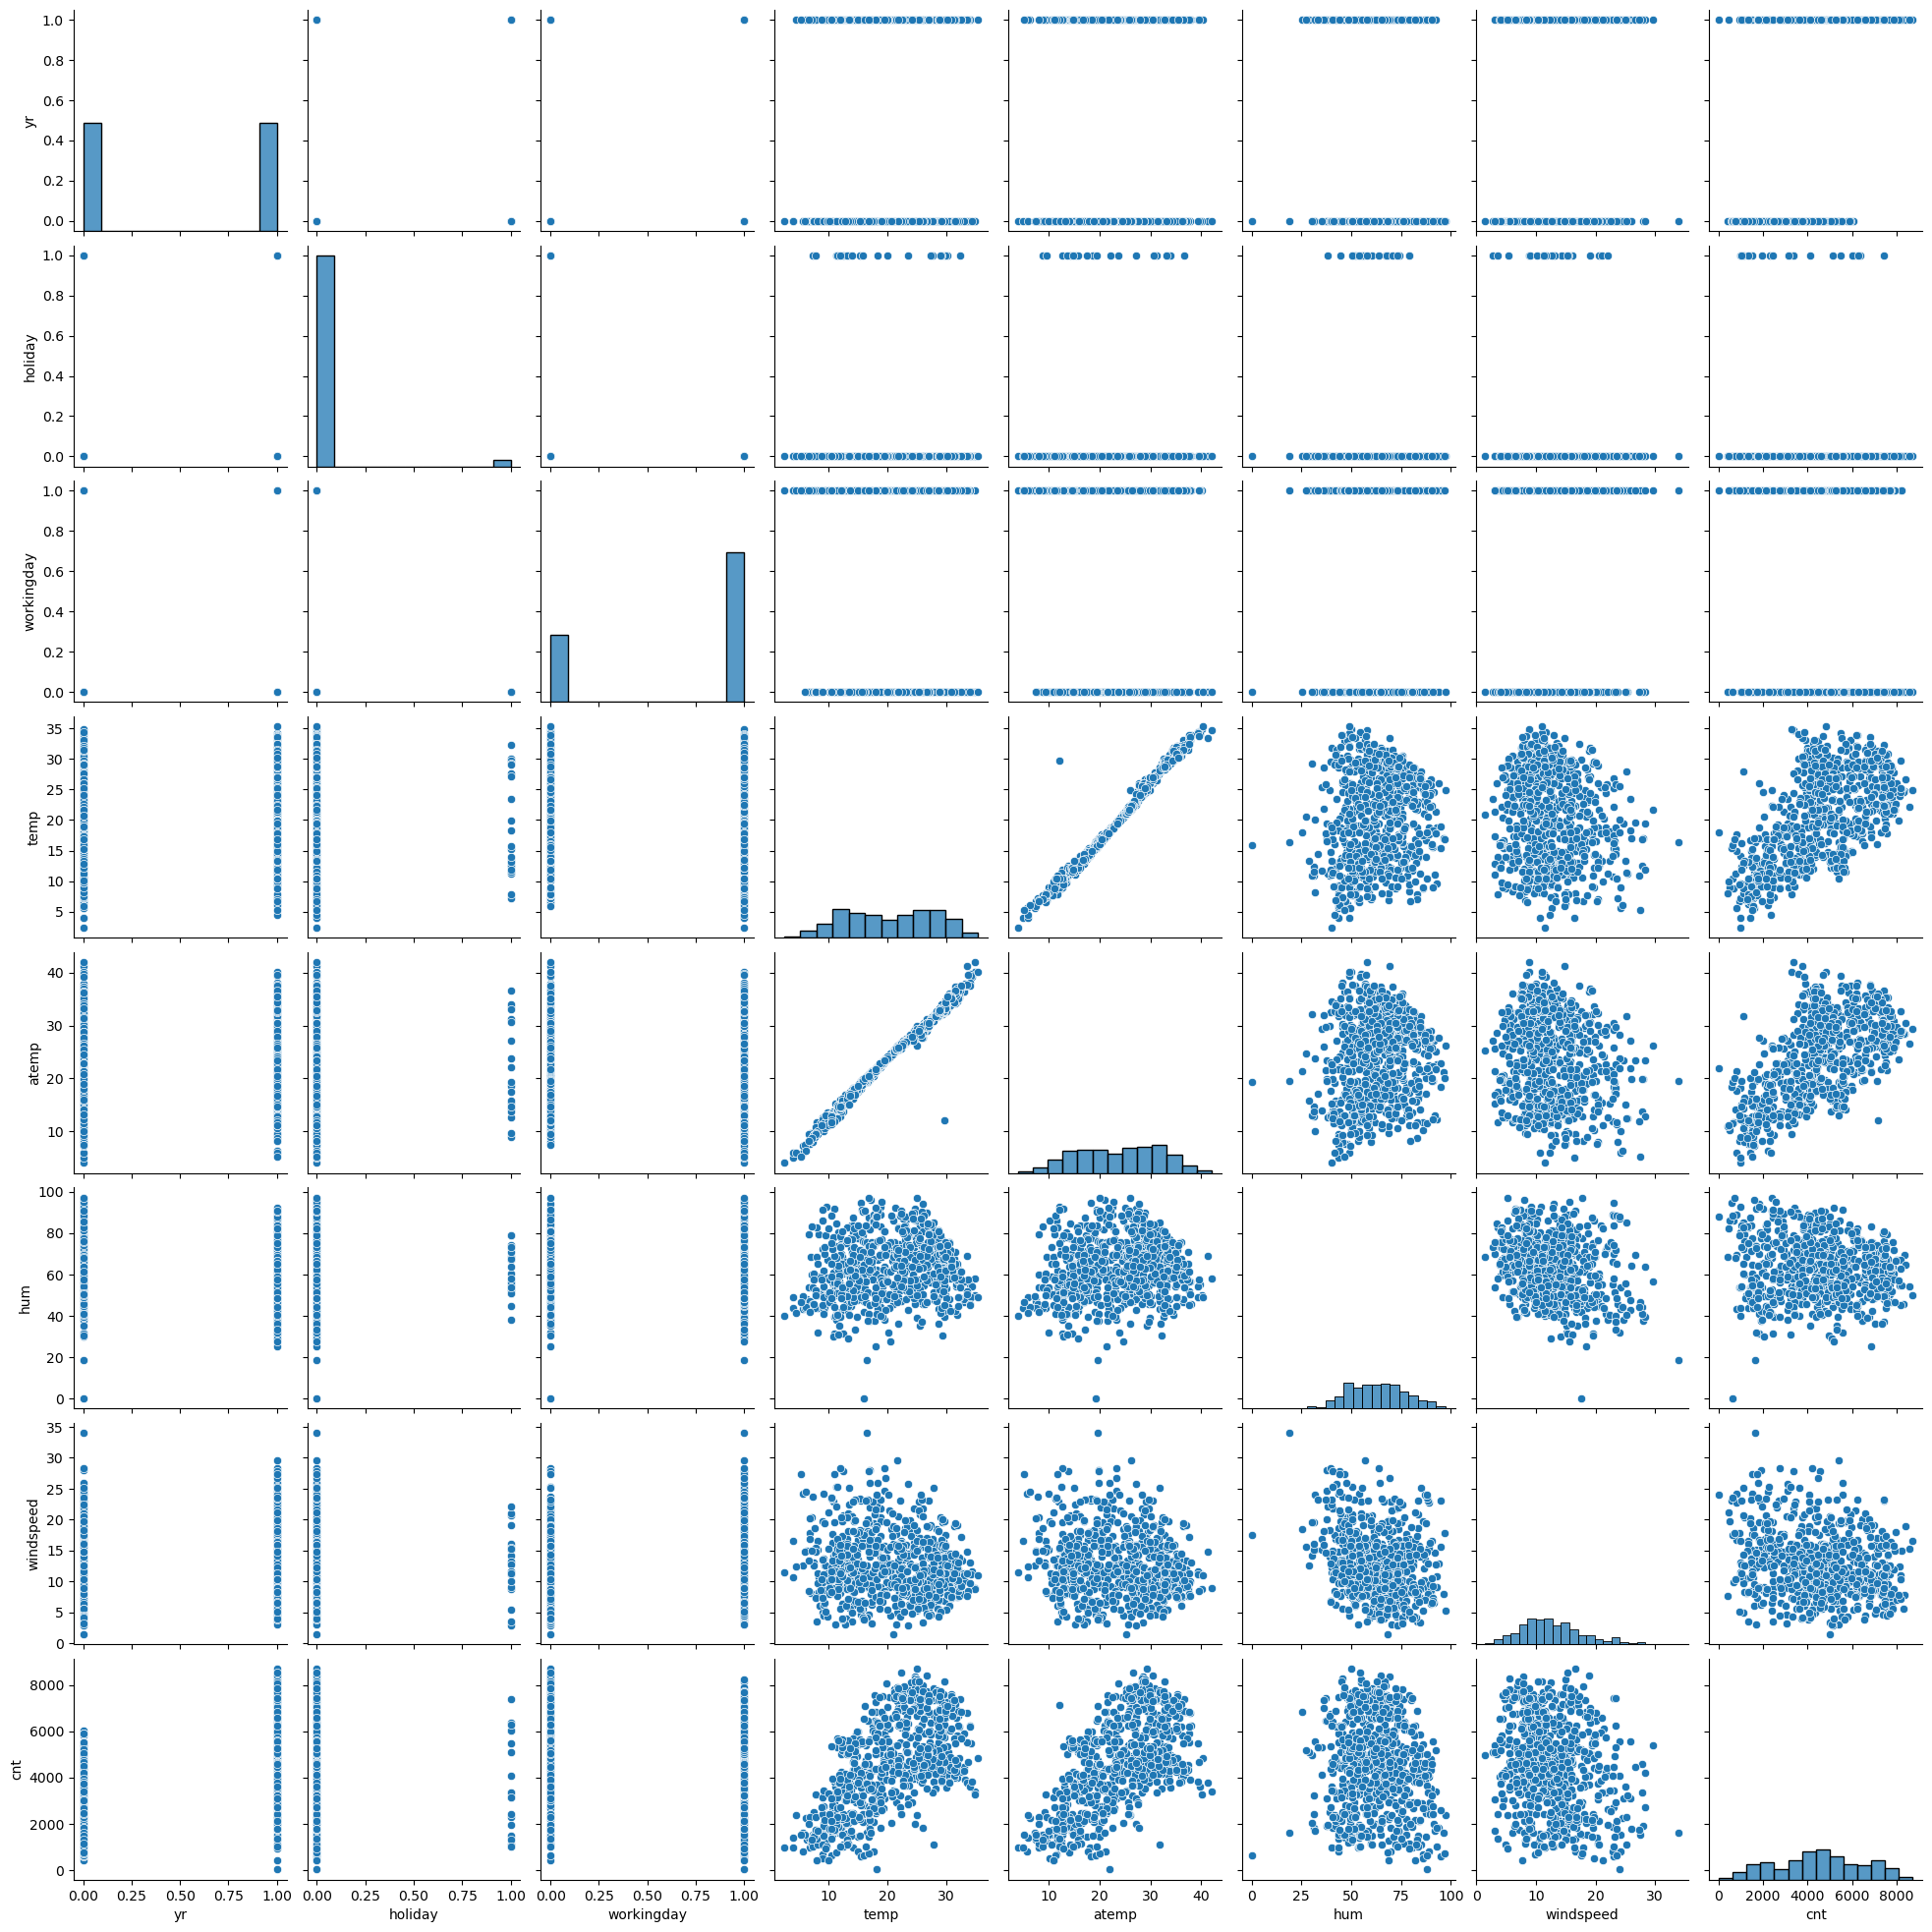

In [22]:
# Plotting all the variables of dataset using pairplot

plt.figure(figsize=(20,15))
sns.pairplot(bike_share_data)
plt.show()

#### ~ Plotting the linear relationship of numerical variables :

<Figure size 1800x2000 with 0 Axes>

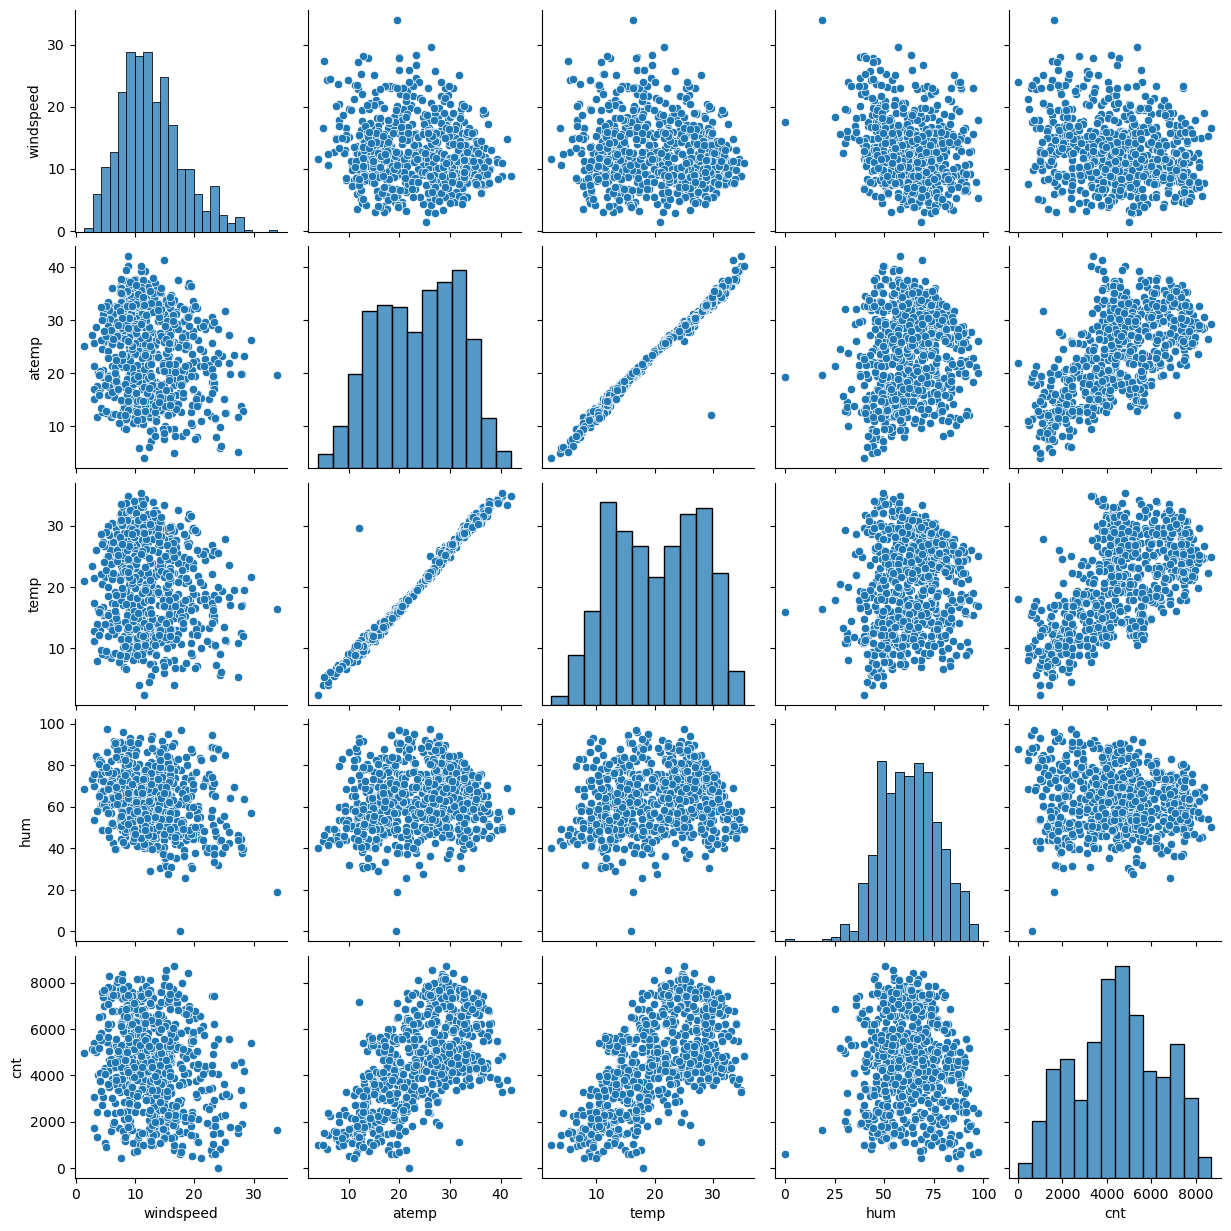

In [24]:
# Plotting the linear relationship for numerical columns of dataset 

plt.figure(figsize = (18,20))
sns.pairplot(data=bike_share_data, vars=['windspeed','atemp','temp','hum','cnt'])
plt.show()

#### Note : 
From above plot we can clearly see that variables 'temp' and 'atemp' are highly correlated to each other, therefore they have strong linear relationship.

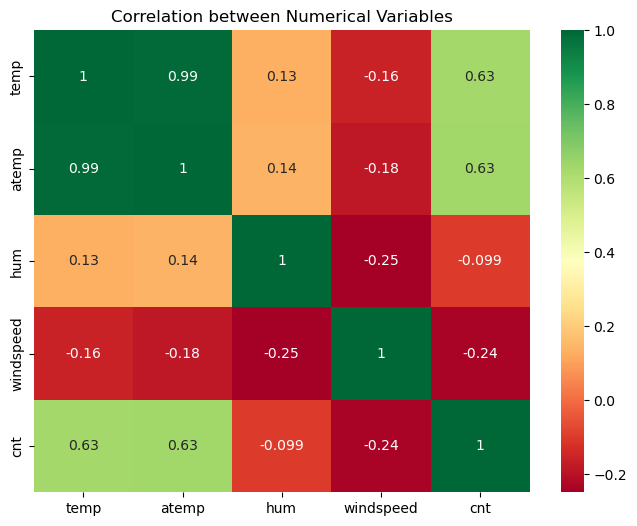

In [26]:
# Plotting the correlation for numerical variables using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(bike_share_data[['temp','atemp','hum','windspeed','cnt']].corr(),cmap="RdYlGn",annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

#### Note :
As we know that variables 'temp' and 'atemp' are highly correlated features, therefore, due to multicolinearity we can't use them together. So based on VIF and p-value w.r.t other variables, we will decide which one to keep.

#### ~ Plotting the linear relationship of categorical variables :

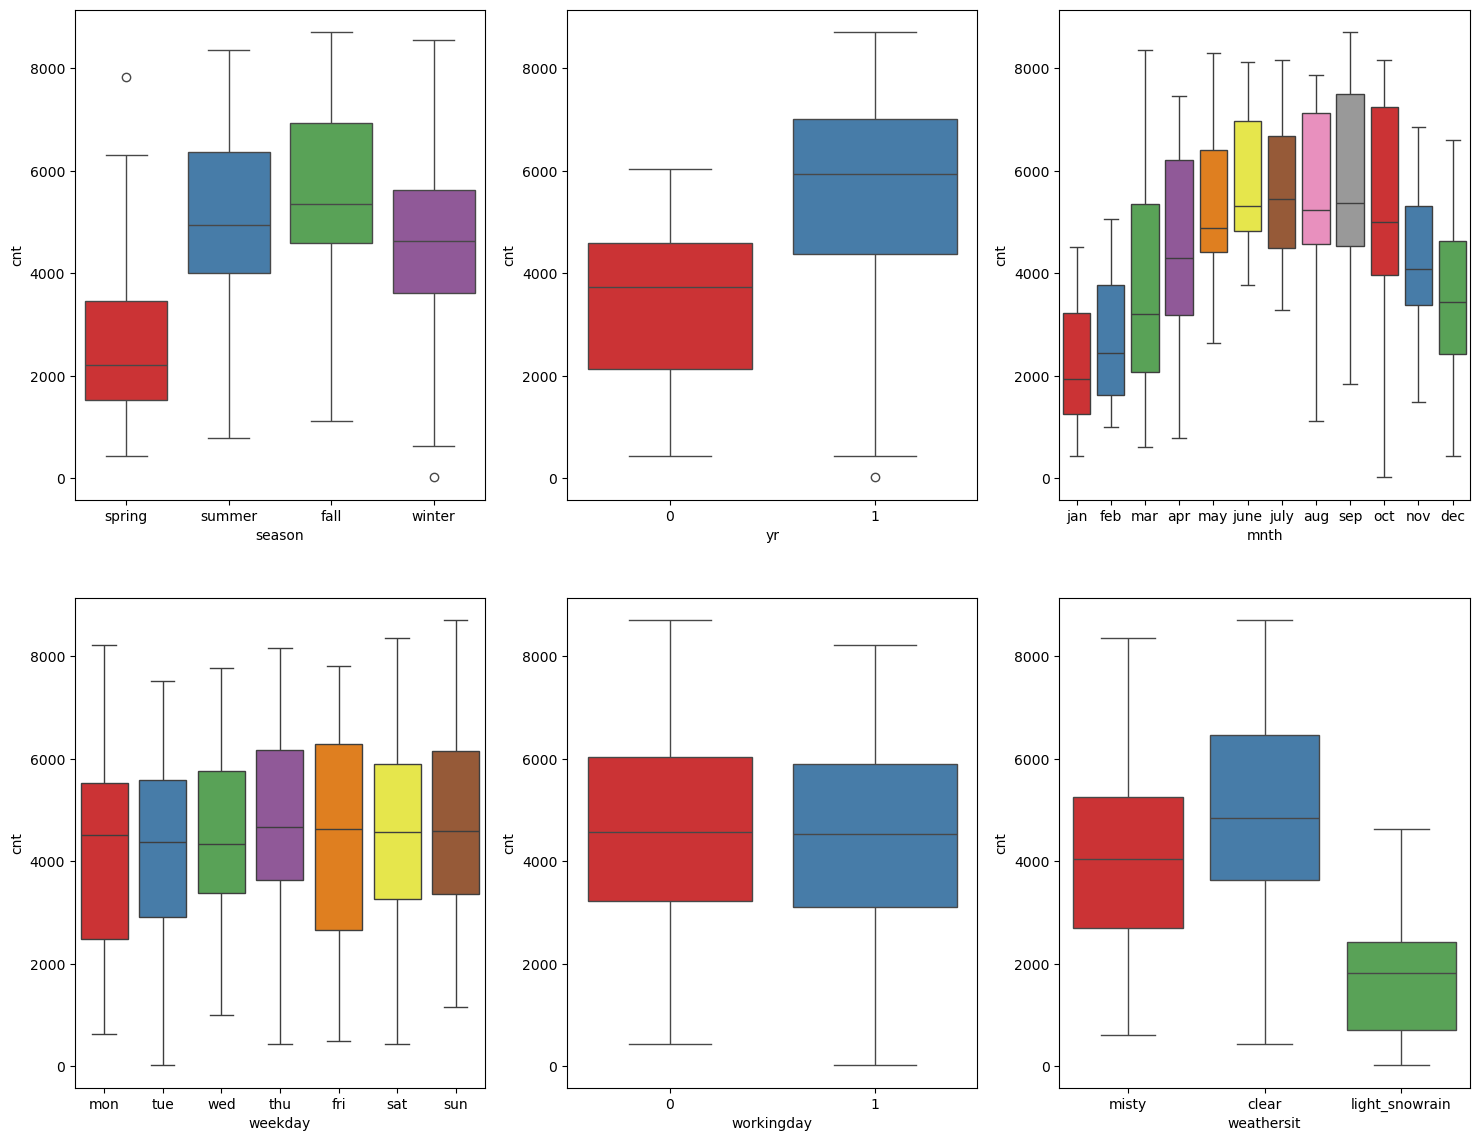

In [29]:
# Plotting all the categorical columns against the target variable 'cnt' .

plt.figure(figsize=(18,14))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_share_data, palette="Set1")

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_share_data,palette="Set1")

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_share_data,palette="Set1")

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_share_data,palette="Set1")

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_share_data,palette="Set1")

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_share_data, palette="Set1")

plt.show()

## Step-3 : Data Preparation

#### ~ Creating the dummies variables for categorical variables :

In [32]:
# Creating dummy variables for 'season','mnth','weekday' and 'weathersit' variables.

season_dm = pd.get_dummies(bike_share_data.season, drop_first=True)

In [33]:
mnth_dm = pd.get_dummies(bike_share_data.mnth, drop_first=True)

In [34]:
weekday_dm = pd.get_dummies(bike_share_data.weekday, drop_first=True)

In [35]:
weathersit_dm = pd.get_dummies(bike_share_data.weathersit, drop_first=True)

#### Data Formatting:

In [37]:
bike_share_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Merging the 'bike_share_data' dataframe, with the dummy variables dataset and creating new updated dataframe 

bike_share_new = pd.concat([ bike_share_data , season_dm , mnth_dm , weekday_dm , weathersit_dm ], axis = 1)

In [39]:
# change the data type of variable 'season','mnth', 'weekday' and 'weathersit' from integer to categorial for better analysis.

season_data = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
mnth_data = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
weekday_data = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
weathersit_data = {1:'Clear',2:'Mist',3:'Light_snowrain',4:'Heavy_snowrain'}

bike_share_data.season = bike_share_data.season.map(season_data)
bike_share_data.mnth = bike_share_data.mnth.map(mnth_data)
bike_share_data.weekday = bike_share_data.weekday.map(weekday_data)
bike_share_data.weathersit = bike_share_data.weathersit.map(weathersit_data)

In [40]:
bike_share_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,False,False,True,False,False,False,False,False,False,True
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,False,False,False,False,False,False,True,False,False,True
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,True,False,False,False,False
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,False,False,False


In [41]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    bool   
 13  summer          730 non-null    bool   
 14  winter          730 non-null    bool   
 15  aug             730 non-null    bool   
 16  dec             730 non-null    bool   
 17  feb             730 non-null    boo

In [42]:
# map True/False to 1/0 in a variables of 'bike_share_new' DataFrame

bike_share_new[['spring','summer','winter','aug','dec','feb','jan','july','june','mar','may','nov','oct','sep','mon','sat','sun','thu','tue','wed',
                'light_snowrain','misty']] = bike_share_new[['spring','summer','winter','aug','dec','feb','jan','july','june','mar','may','nov','oct','sep','mon',
       'sat','sun','thu','tue','wed','light_snowrain','misty']].replace({True: 1, False: 0})

In [43]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    int64  
 13  summer          730 non-null    int64  
 14  winter          730 non-null    int64  
 15  aug             730 non-null    int64  
 16  dec             730 non-null    int64  
 17  feb             730 non-null    int

In [44]:
bike_share_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [45]:
bike_share_new.shape

(730, 34)

In [46]:
# Drop unnecessary columns as we have already created dummy variable for them.

bike_share_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [47]:
# display the updated dataset 

bike_share_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,NaN,0,NaN,0,NaN,1,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,NaN,1,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,NaN,1,NaN,0,NaN,1,NaN,10.420847,11.33210,65.2917,23.458911,2114
726,NaN,1,NaN,0,NaN,0,NaN,10.386653,12.75230,59.0000,10.416557,3095
727,NaN,1,NaN,0,NaN,0,NaN,10.386653,12.12000,75.2917,8.333661,1341
728,NaN,1,NaN,0,NaN,1,NaN,10.489153,11.58500,48.3333,23.500518,1796


In [48]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    int64  
 9   summer          730 non-null    int64  
 10  winter          730 non-null    int64  
 11  aug             730 non-null    int64  
 12  dec             730 non-null    int64  
 13  feb             730 non-null    int64  
 14  jan             730 non-null    int64  
 15  july            730 non-null    int64  
 16  june            730 non-null    int64  
 17  mar             730 non-null    int

In [49]:
bike_share_new.shape

(730, 30)

##  Step-4 : Splitting Data into train and test 

In [51]:
# splitting the dataframe into Train and Test

np.random.seed(0)
bk_train, bk_test = train_test_split(bike_share_new, train_size = 0.7, random_state = 100)

In [52]:
# checking the shape of train and test data

print(bk_train.shape)
print(bk_test.shape)

(510, 30)
(220, 30)


#### ~ Rescaling the Features using MinMaxScaler

In [54]:
# Rescaling the continuous variables

var_scaler = MinMaxScaler()

In [55]:
# create list of numeric variables

var_num = ['temp','atemp','hum','windspeed','cnt']

# Fit and transform the train data

bk_train[var_num] = var_scaler.fit_transform(bk_train[var_num])

In [56]:
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [57]:
bk_train[var_num].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


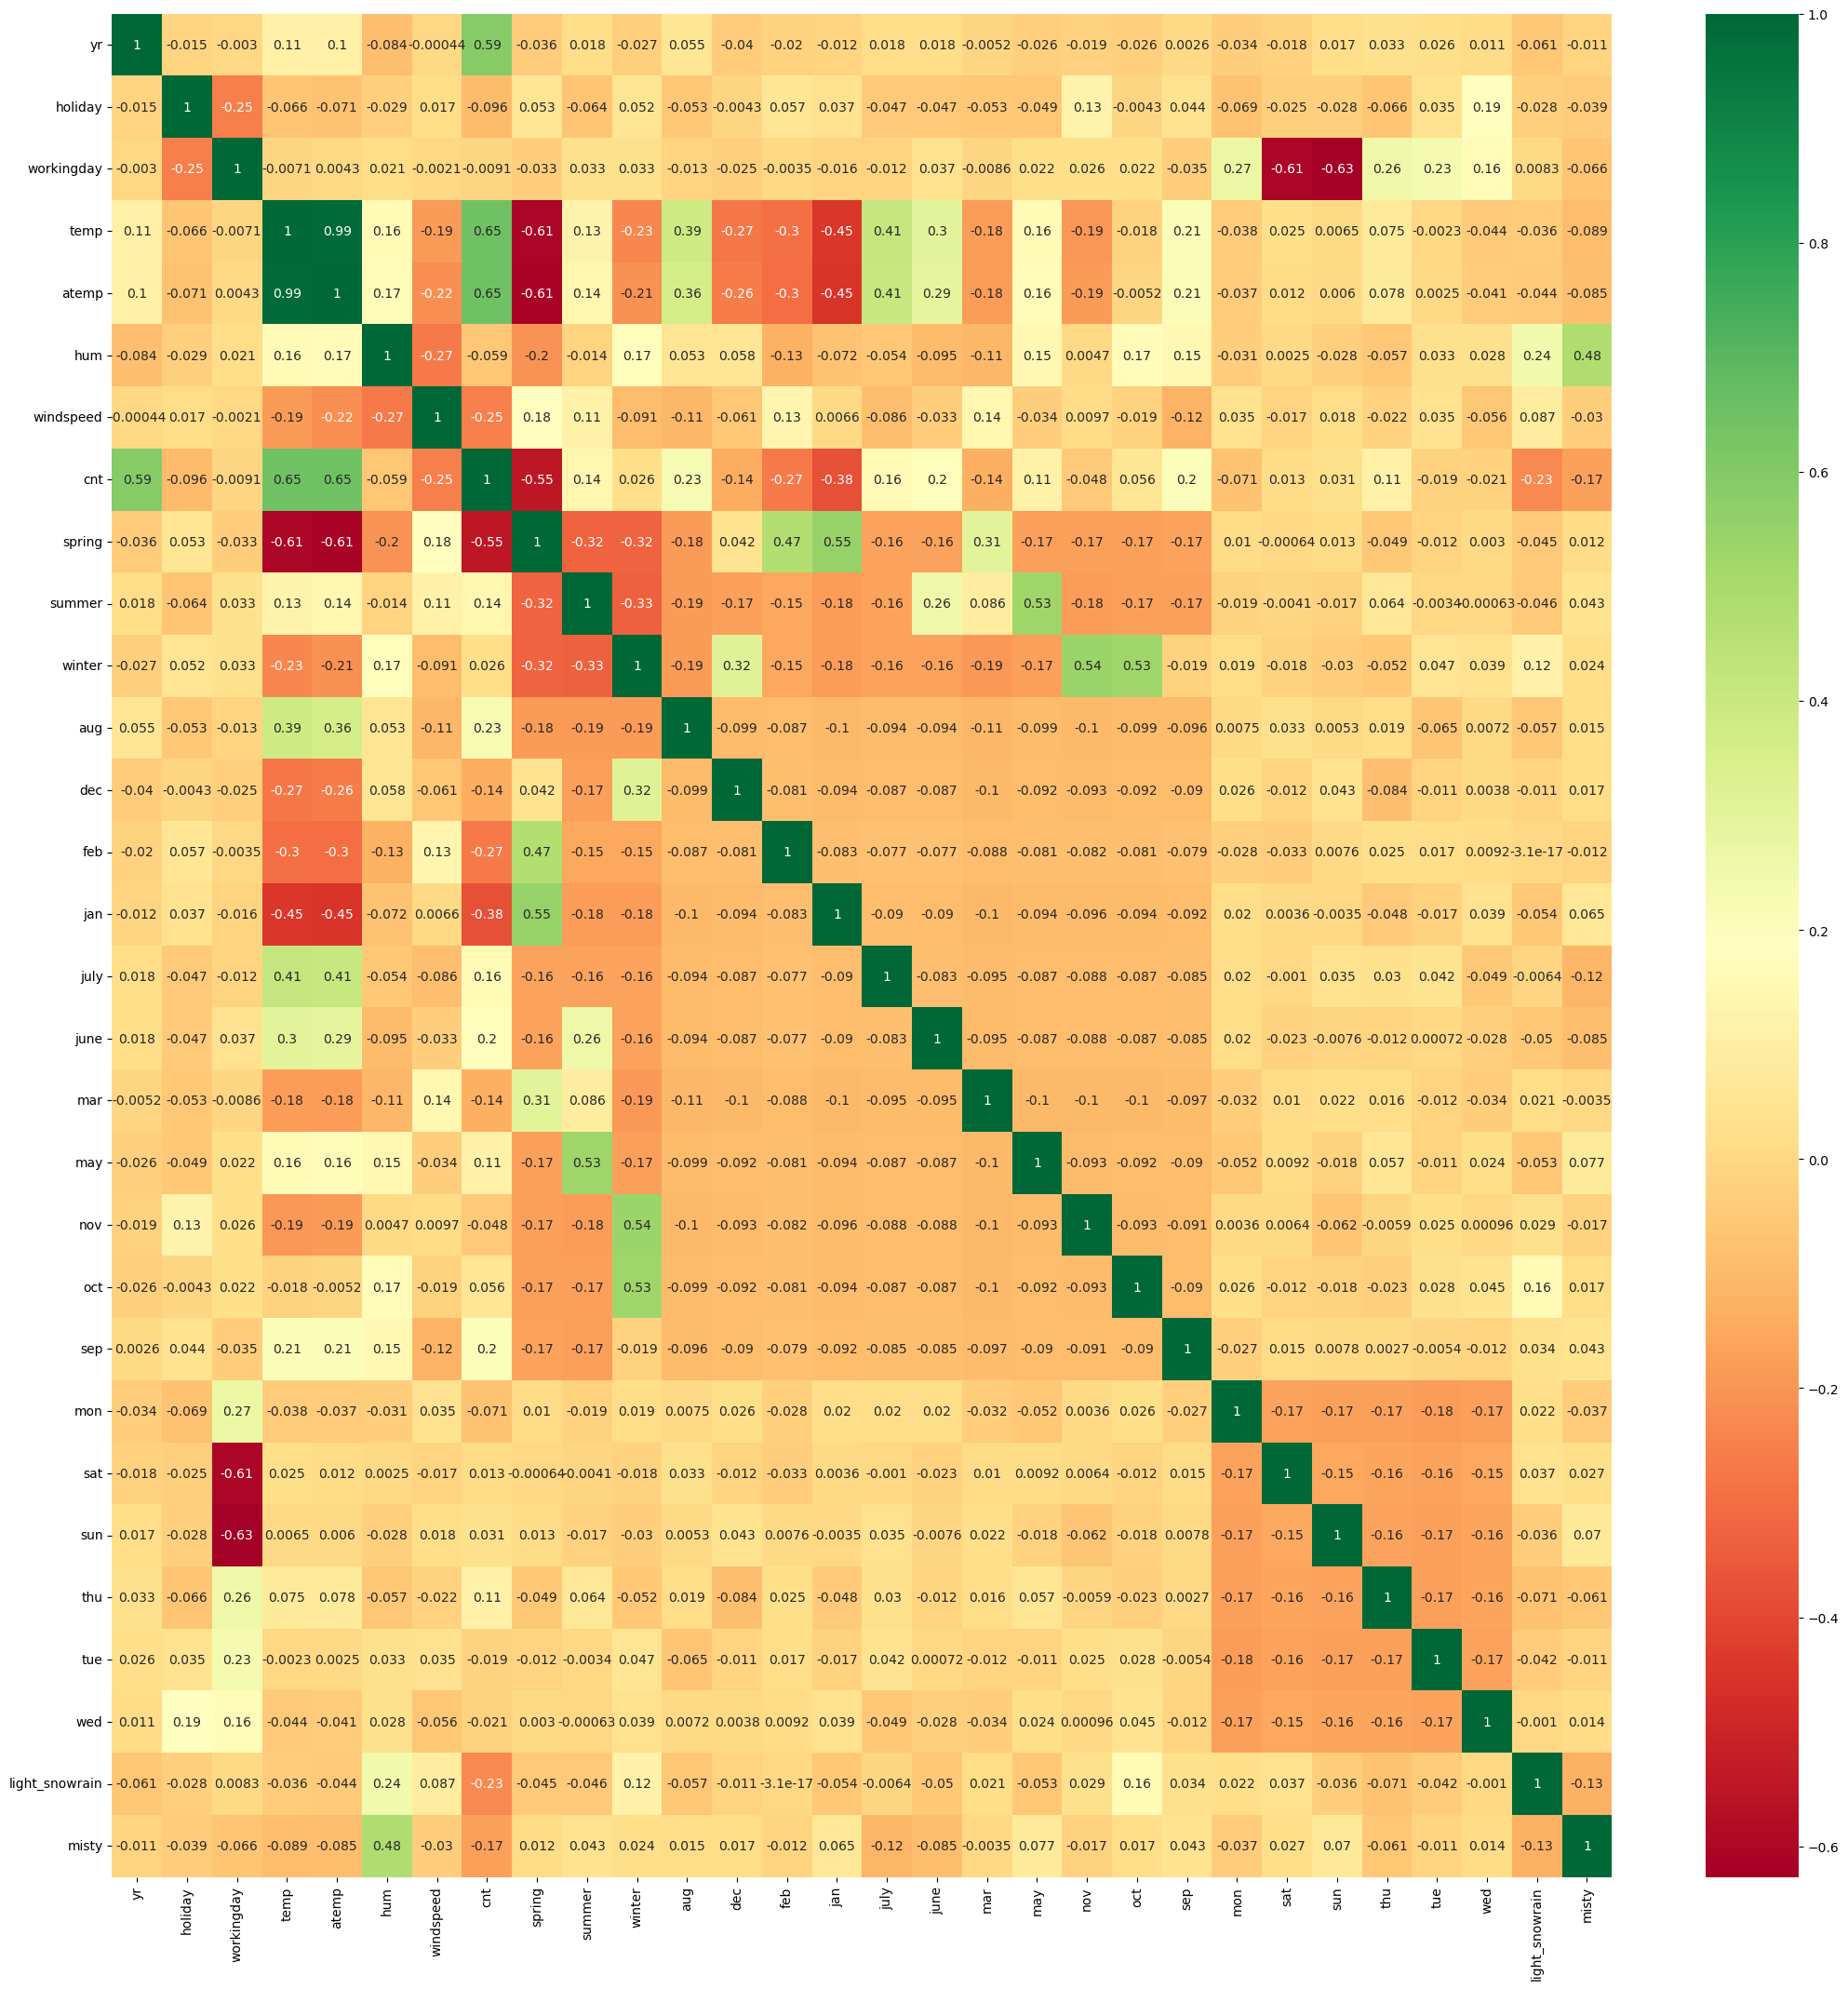

In [58]:
# Checking the correlation coefficients to find out which variables are highly correlated

plt.figure(figsize = (26,26))
sns.heatmap(bk_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

##### Note:
1. 'atemp' and 'temp' have strong correlation.
2. 'cnt' is highly correlated 'yr' , 'atemp' and 'temp'.
3. 'winter' is correlated 'oct' and 'nov'.
4. 'spring' with 'jan' and 'feb'
5. 'summer' with 'may'
6. 'misty' with 'hum'

## Step-5  :  Building the linear Models for Train set

In [61]:
bk_y_train = bk_train.pop('cnt')
bk_X_train = bk_train

#### Building Model using RFE(Recursive Feature Elimination)

In [63]:
# Performing Recursive feature elimination 

lr = LinearRegression()
lr.fit(bk_X_train, bk_y_train)

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(bk_X_train, bk_y_train)

In [64]:
# display lists of variables selected by RFE using automated approach

list(zip(bk_X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('light_snowrain', True, 1),
 ('misty', True, 1)]

In [65]:
# Adding the selected columns by RFE in bike_col list

bike_col = bk_X_train.columns[rfe.support_]
print(bike_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_snowrain',
       'misty'],
      dtype='object')


In [66]:
# Display list of features rejected by RFE

bk_X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [67]:
# create a function to build a model using statsmodel api

def build_model(bk_col):
    bk_X_train_sm = sm.add_constant(bk_X_train[bk_col])
    bk_lm = sm.OLS(bk_y_train, bk_X_train_sm).fit()
    print(bk_lm.summary())
    return bk_lm


In [68]:
# create a Function to calculate VIFs of the columns as a parameter

def calculate_vif(bk_col):
    bk = bk_X_train[bk_col]
    vif = pd.DataFrame()
    vif['Features'] = bk.columns
    vif['VIF'] = [variance_inflation_factor(bk.values, i) for i in range(bk.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [69]:
bk_col = bk_X_train.columns[rfe.support_]
print(bk_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_snowrain',
       'misty'],
      dtype='object')


### Building Model - 1

In [71]:
# Calculate VIF for 1st model

bk_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_snowrain',
       'misty']
calculate_vif(bk_col)

          Features    VIF
3              hum  30.89
2             temp  17.79
4        windspeed   4.72
5           spring   4.37
7           winter   4.06
6           summer   2.82
14           misty   2.32
0               yr   2.09
11             nov   1.85
9              jan   1.75
10            july   1.59
8              dec   1.56
12             sep   1.41
13  light_snowrain   1.28
1          holiday   1.06


#### Note :
The above model shows that 'hum' variable has very high VIF value which is insignificant and needs to be dropped.

In [73]:
# Build 1st Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          8.15e-189
Time:                        17:16:47   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

### Building Model - 2

In [75]:
# Dropping the variable 'hum' as it has high VIF value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light_snowrain','misty']

#  Calculate VIF for next model

calculate_vif(bk_col)

          Features   VIF
2             temp  5.17
3        windspeed  4.67
6           winter  2.95
4           spring  2.89
5           summer  2.24
0               yr  2.07
10             nov  1.81
8              jan  1.66
9             july  1.59
13           misty  1.57
7              dec  1.47
11             sep  1.35
12  light_snowrain  1.09
1          holiday  1.06


#### Note :
The above model shows that VIF value are in limit for now.

In [77]:
# Build 2nd Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          4.75e-186
Time:                        17:16:48   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

#### Note :
The above model shows that 'nov' variable has high p-value which is insignificant and needs to be dropped.

In [79]:
# Dropping the variable 'nov' as it has high p-value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'dec', 'jan', 'july', 'sep', 'light_snowrain','misty']


### Building Model - 3

In [81]:
# Build 3rd Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.74e-186
Time:                        17:16:48   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

#### Note :
The above model shows that 'dec' variable has high p-value and can be dropped.

In [83]:
# Dropping the variable 'dec' as it has high p-value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'jan', 'july', 'sep', 'light_snowrain','misty']

#  Calculate VIF for next model

calculate_vif(bk_col)

          Features   VIF
2             temp  5.13
3        windspeed  4.62
4           spring  2.75
5           summer  2.24
0               yr  2.07
6           winter  1.78
7              jan  1.61
8             july  1.59
11           misty  1.56
9              sep  1.34
10  light_snowrain  1.08
1          holiday  1.04


### Building Model - 4

In [85]:
# Build 4th Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          8.14e-187
Time:                        17:16:48   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

#### Note :
The above model shows that 'jan' variable has high p-value and can be dropped.

In [87]:
# Dropping the variable 'dec' as it has high p-value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'july', 'sep', 'light_snowrain','misty']

#  Calculate VIF for next model

calculate_vif(bk_col)

          Features   VIF
2             temp  5.09
3        windspeed  4.60
5           summer  2.23
4           spring  2.08
0               yr  2.07
6           winter  1.78
7             july  1.58
10           misty  1.55
8              sep  1.34
9   light_snowrain  1.08
1          holiday  1.04


### Building Model - 5

In [89]:
# Build 5th Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        17:16:48   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

#### Note :
The above model shows that 'july' variable has high p-value and can be dropped.

In [91]:
# Dropping the variable 'july' as it has high p-value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'sep', 'light_snowrain','misty']

#  Calculate VIF for next model

calculate_vif(bk_col)

         Features   VIF
3       windspeed  4.60
2            temp  3.84
0              yr  2.07
4          spring  1.99
5          summer  1.90
6          winter  1.63
9           misty  1.55
7             sep  1.23
8  light_snowrain  1.08
1         holiday  1.04


#### Note :
Now we can notice that all variables have VIF value less than 5, which is good sign of better model.

### Building Model - 6

In [94]:
# Build 6th Regression Model :

build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.47e-186
Time:                        17:16:49   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

#### Note :
The above model shows that 'spring' variable has high p-value and can be dropped.

In [96]:
# Dropping the variable 'spring' as it has high p-value

bk_col = ['yr', 'holiday', 'temp', 'windspeed', 'summer','winter', 'sep', 'light_snowrain','misty']

#  Calculate VIF for next model

calculate_vif(bk_col)

         Features   VIF
2            temp  3.68
3       windspeed  3.06
0              yr  2.00
4          summer  1.57
8           misty  1.48
5          winter  1.37
6             sep  1.20
7  light_snowrain  1.08
1         holiday  1.04


### Building Model - 7

In [98]:
build_model(bk_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.83e-186
Time:                        17:16:49   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

#### Note : Now we can finalize this linear model-7 for further analysis due to following points:

1. It has very low multicolinearity among predictors.
2. p-values are zero for all variables.
3. R-squared value is 0.83 and F-statistic is 271.9.
4. Overall linear model has become significant now

In [100]:
# Lets check the parameters and their coefficient values

build_model(bk_col).params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.83e-186
Time:                        17:16:49   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

const             0.125926
yr                0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
summer            0.088080
winter            0.129345
sep               0.101195
light_snowrain   -0.282869
misty            -0.078375
dtype: float64

In [101]:
#Build a model with all variables to select features automatically

def build_model_sk(X,y):
    bk_lr = LinearRegression()
    bk_lr.fit(X,y)
    return bk_lr

In [102]:
#Let us build the final model using sklearn

lr = build_model_sk(bk_X_train[bk_col],bk_y_train)
print(lr.intercept_,lr.coef_)

0.12592584330857526 [ 0.23286073 -0.09868539  0.54800759 -0.15324618  0.08808036  0.1293451
  0.10119495 -0.28286936 -0.07837453]


## Step-6  :  Residual Analysis

In [104]:
bk_y_train_pred = lr.predict(bk_X_train[bk_col])
bk_y_train_pred

array([ 0.76494309,  0.48371653,  0.39148531,  0.55643741,  0.26676205,
        0.78925044,  0.81481016,  0.70678061,  0.60311849,  0.57607708,
        0.85834597,  0.41976539,  0.73067936,  0.51550331,  0.76790021,
        0.65966637,  0.55923212,  0.54912711,  0.60654914,  0.54135344,
        0.61156151,  0.76773392,  0.59481449,  0.28316076,  0.8416874 ,
        0.401349  ,  0.79310093,  0.73068388,  0.5604397 ,  0.44461589,
        0.48540866,  0.62166973,  0.39555026,  0.52083347,  0.66809157,
        0.32995595,  0.52563385,  0.7728183 ,  0.80977428,  0.57881346,
        0.45554081,  0.52168995,  0.19559948,  0.72352565,  0.54785033,
        0.68142779,  0.79949316,  0.637021  ,  0.75895946,  0.48157632,
        0.75165255,  0.56501618,  0.51133153,  0.63978857,  0.58060357,
        0.74567708,  0.49475387,  0.86684852,  0.72612078,  0.3356951 ,
        0.40251557,  0.60246045,  0.24065626,  0.52705967,  0.78396188,
        0.66028077,  0.44296502,  0.50605439,  0.78672635,  0.76

In [105]:
bk_y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

#### ~ Normality of error terms

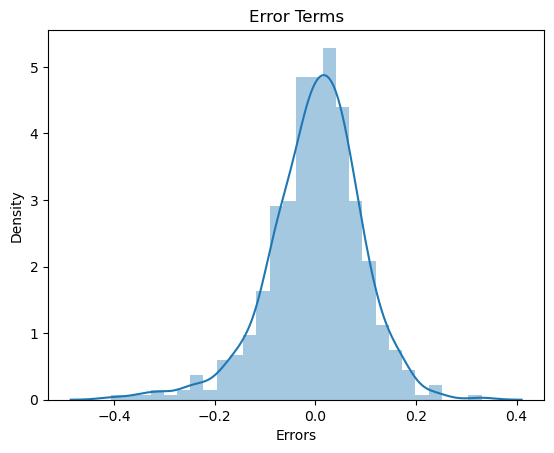

In [107]:
# Lets plot a histogram for the error terms

sub = bk_y_train - bk_y_train_pred
sns.distplot(sub)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

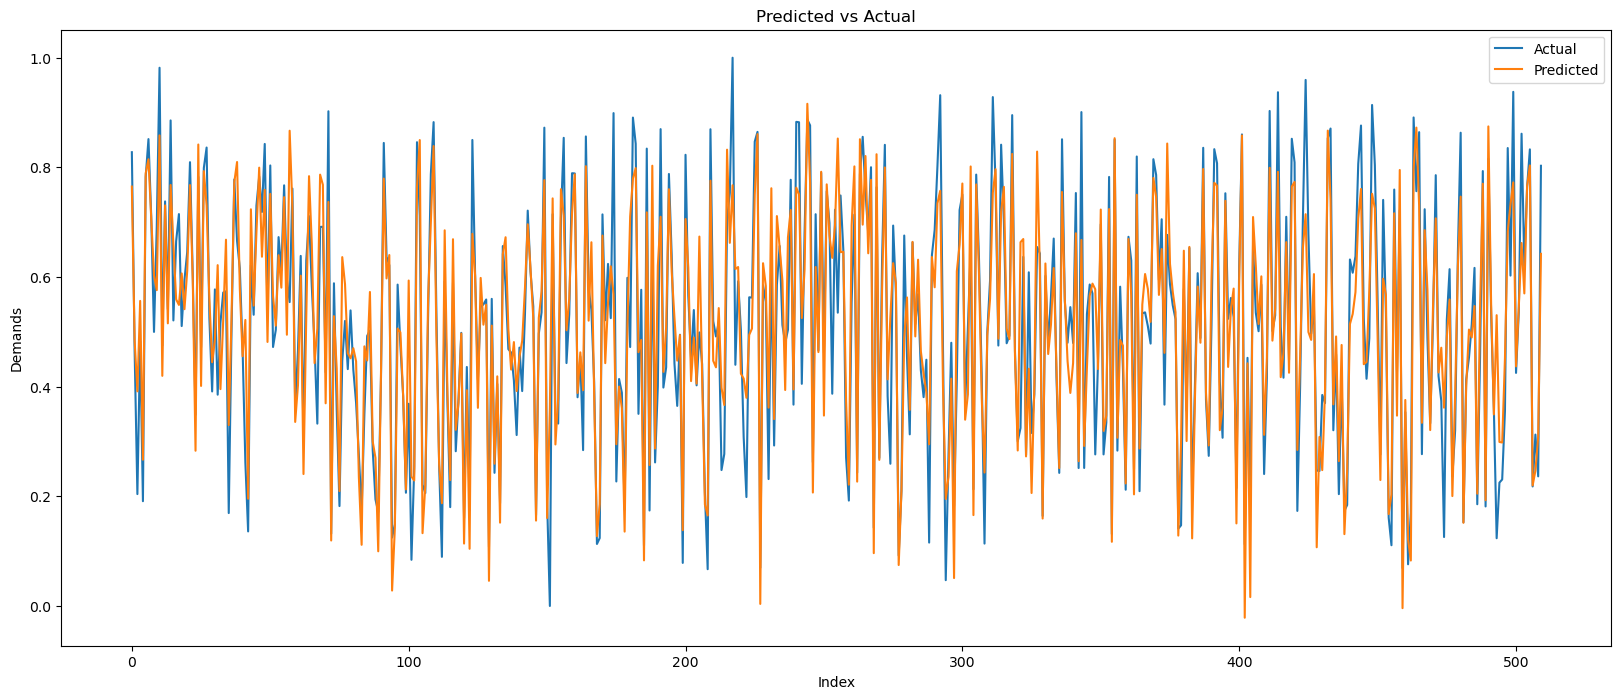

In [108]:
# Actual vs Predicted

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(bk_y_train)),bk_y_train)
l2, = ax.plot(range(len(bk_y_train_pred)),bk_y_train_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual');
plt.ylabel('Demands')
plt.xlabel('Index')
plt.show()

#### ~ R-Squared value of predictions for train data

In [110]:
#Check R-squared Value

r2 = r2_score(bk_y_train,bk_y_train_pred)
round(r2,4)

0.8303

#### ~ Adjusted R-squared value for train data

In [112]:
# Calculating Adjusted-R^2 value for the train dataset

adj_r2 = round(1-(1-r2)*(bk_X_train.shape[0]-1)/(bk_X_train.shape[0]-bk_X_train.shape[1]-1),4)
print(adj_r2)

0.8201


#### ~  Independence of Residuals

From final Model-7 we came to know that 'Durbin-Watson' value is 2.097, which shows that there is no autocorrelation.

#### ~ Multi Collinearity

In [116]:
calculate_vif(bk_col)

         Features   VIF
2            temp  3.68
3       windspeed  3.06
0              yr  2.00
4          summer  1.57
8           misty  1.48
5          winter  1.37
6             sep  1.20
7  light_snowrain  1.08
1         holiday  1.04


##### Note :
As we can see the VIF value of all variables are less than 5, therefore, there is no multicolinearity.

#### ~  Homoscedasticity :

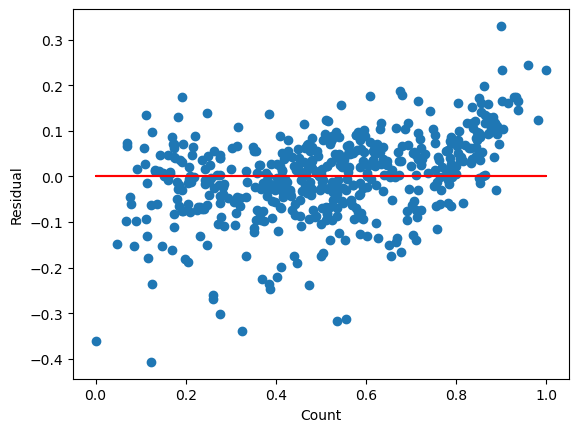

In [119]:
sub = bk_y_train - bk_y_train_pred
plt.scatter(bk_y_train,sub);
plt.plot(bk_y_train,(bk_y_train - bk_y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Note:

We can see that there is no visible pattern observed from above plot for residuals.

## Step-7  :  Predictions and Evaluation on Test set 

In [122]:
# create list of numeric variables

var_num = ['temp','atemp','hum','windspeed','cnt']

# Fit and transform the train data

bk_test[var_num] = var_scaler.fit_transform(bk_test[var_num])
bk_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [123]:
bk_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


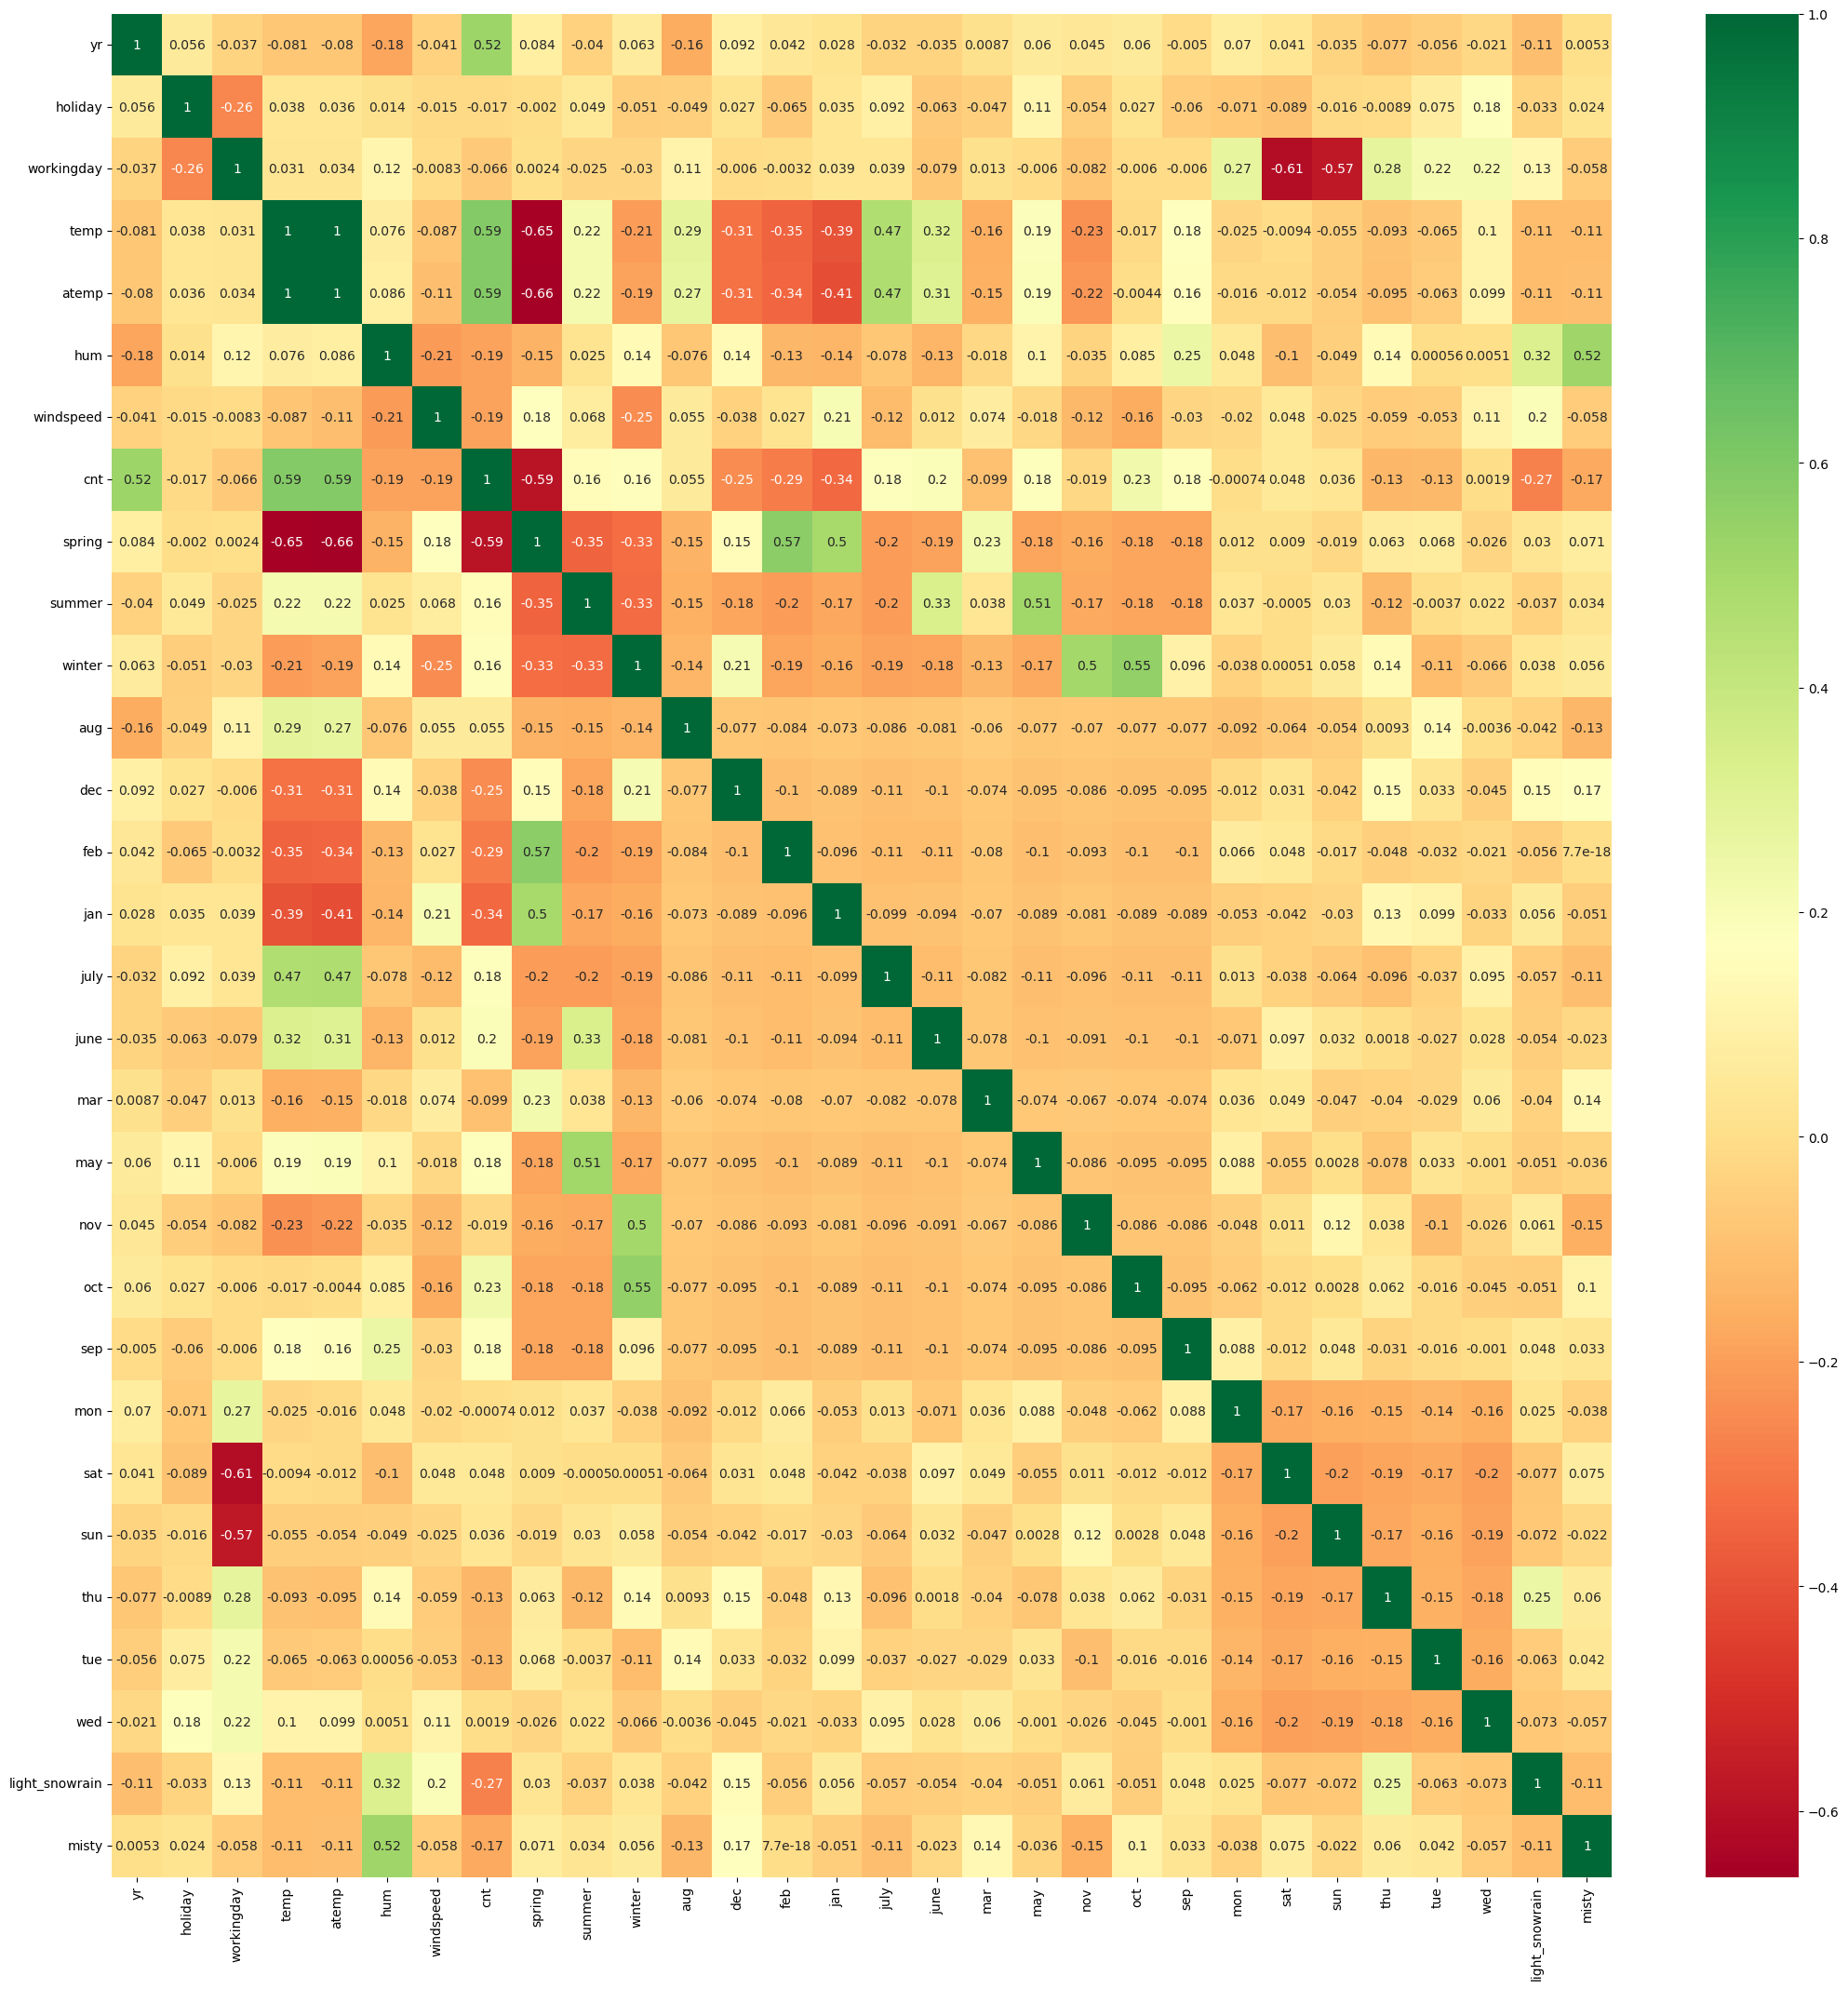

In [124]:
# Checking the correlation coefficients to find out which variables are highly correlated

plt.figure(figsize = (26,26))
sns.heatmap(bk_test.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [125]:
# Building the linear Models for Test set

bk_y_test = bk_test.pop('cnt')
bk_X_test = bk_test

In [126]:
bk_X_test = bk_X_test[bk_col]
bk_X_test.head()

,yr,holiday,temp,windspeed,summer,winter,sep,light_snowrain,misty
184,0,1,0.837241,0.149393,0,0,0,0,1
535,1,0,0.911423,0.231142,1,0,0,0,0
299,0,0,0.496221,0.443398,0,1,0,0,1
221,0,0,0.890387,0.449707,0,0,0,0,0
152,0,0,0.821739,0.682387,1,0,0,0,0


In [127]:
# Add constant variable to test dataframe

bk_X_test_sm = sm.add_constant(bk_X_test)
bk_X_test_sm.head()

,const,yr,holiday,temp,windspeed,summer,winter,sep,light_snowrain,misty
184,1.0,0,1,0.837241,0.149393,0,0,0,0,1
535,1.0,1,0,0.911423,0.231142,1,0,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,1
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,1,0,0,0,0


In [128]:
# Prediction of test data values

bk_y_test_pred = lr.predict(bk_X_test[bk_col])

### ~ Model Evaluation

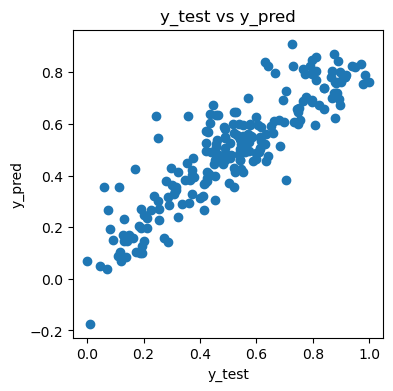

In [130]:
# plotting the y test and y test predicted set

plt.figure(figsize=[4,4])
plt.scatter(bk_y_test,bk_y_test_pred);
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [131]:
# Check R-squared Value for test set

r2 = r2_score(bk_y_test, bk_y_test_pred)
round(r2,4)

0.7853

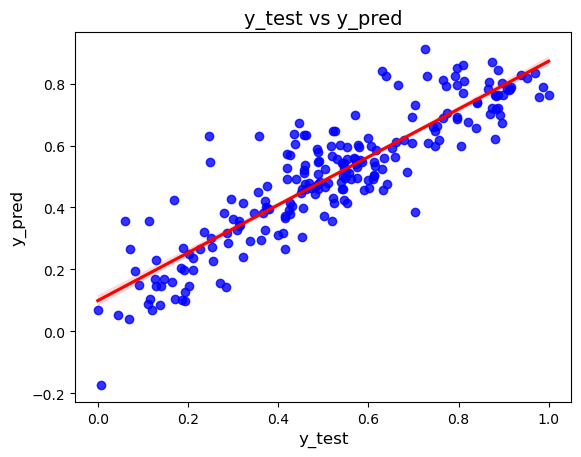

In [132]:
# Visualizing the fit on the test data
# lets create a Regression plot

plt.figure()
sns.regplot(x=bk_y_test, y=bk_y_test_pred, ci=70, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=14)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

#### ~ Adjusted R-squared value for test data

In [134]:
# Calculating Adjusted-R^2 value for the test dataset

adj_r2 = round(1-(1-r2)*(bk_X_test.shape[0]-1)/(bk_X_test.shape[0]-bk_X_test.shape[1]-1),4)
print(adj_r2)

0.7761


In [135]:
# Lets check the parameters and their coefficient values by re-building final model of manual + rfe approach using statsmodel to interpret it

build_model(bk_col).params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.83e-186
Time:                        17:16:57   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

const             0.125926
yr                0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
summer            0.088080
winter            0.129345
sep               0.101195
light_snowrain   -0.282869
misty            -0.078375
dtype: float64

In [136]:
# Lets print the intercept and coefficient again using sklearn

print(lr.intercept_,lr.coef_)

0.12592584330857526 [ 0.23286073 -0.09868539  0.54800759 -0.15324618  0.08808036  0.1293451
  0.10119495 -0.28286936 -0.07837453]


## Conclusion :

We can see that the equation of our best fitted line is:

#### cnt = 0.1259 + (0.2328)*yr - (0.0986)*holiday + (0.5480)*temp - (0.1532)*windspeed + (0.0880)*summer + (0.1293)*winter + (0.1011)*sep              -(0.2828)*light_snowrain - (0.0783)*misty

#### ~  R-squared and Adjusted R-squared value for Train and Test dataset:

- Train dataset R^2             :   0.8303
- Test dataset R^2              :   0.7853
- Train dataset Adjusted R^2    :   0.7724   
- Test dataset Adjusted R^2     :   0.7761

#### ~  Significant variables to predict the demand for bikes sharing :

- yr
- holiday
- temp
- windspeed
- summer (season)
- winter (season)
- sep (month)
- Sunday
- weathersit (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- weathersit (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)